## Unsupervised Learning And Data Scaling

Etiketlenmemiş verileri kümeleyerek anlaşılır ve makine öğrenmesi modeline uygun hale getirmeye çalışmaktır. 
- MinMaxScaler: Veriler 0 ile 1 arası sıkıştırır
- StandartScaler: Verilerin ortalamasını 0, standart sapmasını 1 olarak ayarlar
- Normalizer: Her bir örneğin L1 ve L2 normunu 1'e eşitler
- RobustScaler: StandartScaler gibi çalışır ama ortalama ve varyans yerine, medyan ve çeyrekleri kullanır. Her bir özniteliğin aynı istatistiksel özelliğe sahip olmasını ister. Aykırı verileri dikkate almaz.


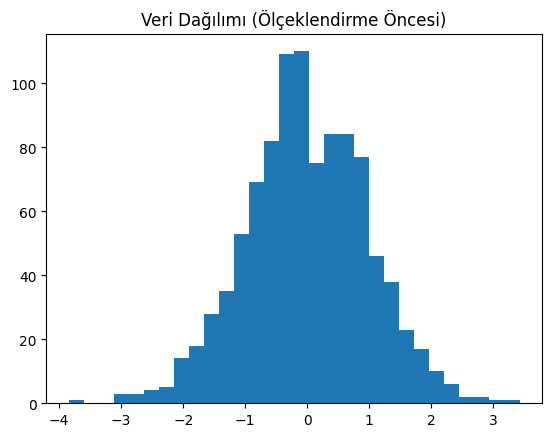

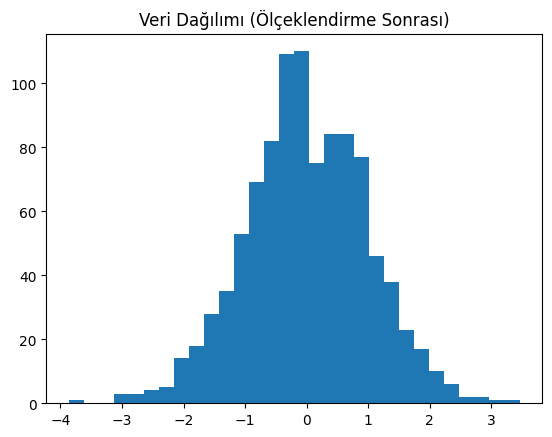

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Örnek veri oluşturma
data = np.random.randn(1000)

# Veri dağılımını gösteren histogram
plt.hist(data, bins=30)
plt.title('Veri Dağılımı (Ölçeklendirme Öncesi)')
plt.show()

# Veriyi standartlaştırma (ölçeklendirme)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

# Ölçeklendirilmiş verinin histogramı
plt.hist(data_scaled, bins=30)
plt.title('Veri Dağılımı (Ölçeklendirme Sonrası)')
plt.show()


In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,random_state=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train) 

MinMaxScaler()

In [7]:
x_train_scaled = scaler.transform(x_train)

In [8]:
x_train.min(axis=0)

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 5.024e-02, 1.153e-01, 3.602e-01,
       7.570e-01, 6.802e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       9.539e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.566e-01, 5.521e-02])

In [9]:
x_train_scaled.min(axis=0)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
x_train_scaled.max(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [11]:
x_train.max(axis=0)

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 2.867e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.575e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.226e-01, 9.379e-01, 1.170e+00, 2.910e-01, 5.774e-01, 1.486e-01])

In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
data = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(data.data,data.target,random_state=1)

In [14]:
model = SVC(C=100,gamma='auto')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6153846153846154

Modelin doğruluk oranı çok düşük. MinMax yaparak yükselteceğiz.

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [16]:
model.fit(x_train_scaled,y_train)
model.score(x_test_scaled,y_test)

0.965034965034965